## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
#create variable for mouse metadata df and show header to check data for merge
mouse_df = pd.read_csv(mouse_metadata_path)
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
drug_regimen = mouse_df['Drug Regimen']

In [4]:
#create variable for study results df and show header to check data for merge
study_results_df = pd.read_csv(study_results_path)
study_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single database using a merge on mouse ID
mouse_study_merge_df = pd.merge(mouse_df, study_results_df, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study_merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice.
count_mice = mouse_df["Mouse ID"].count()
count_mice

249

In [7]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = mouse_study_merge_df[mouse_study_merge_df.duplicated(['Mouse ID', 'Timepoint'])]
dup_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Optional: Get all the data for the duplicate mouse ID using loc 
only_dup_ID = mouse_study_merge_df.loc[mouse_study_merge_df["Mouse ID"] == "g989", :]
print(only_dup_ID) # to check data


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_df = mouse_study_merge_df #named a variable for the cleaned df to avoid overwriting the original

#use loc to remove the duplicate mouse ID, then print to check the data
clean_study_df = clean_study_df.loc[clean_study_df['Mouse ID']!='g989']#index into the column, call the value
clean_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
#set an index for regimen using Mouse ID for use in later analysis
drug_regimen = clean_study_df.set_index(["Mouse ID"])["Drug Regimen"]

In [11]:
# Checking the number of mice in the clean DataFrame.
clean_group = clean_study_df.groupby(['Mouse ID'])

#Pull in the mean of rows/columns order to check data...#summary returns 248 rows and 7 colummns
clean_group_df = clean_group.count()
clean_group_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10
z581,10,10,10,10,10,10,10


### Summary Statistics

In [12]:
# Check the number of Drug Regimens in the clean DataFrame.
clean_group = clean_study_df.groupby(['Drug Regimen'])

#Begin to pull in the mean of rows/columns for the summary data table, below is the mean for each regimen
clean_mean_df = clean_group.mean()
clean_mean_df

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,13.456522,19.965217,21.565217,40.675741,0.713043
Ceftamin,13.247191,27.398876,19.747191,52.591172,1.179775
Infubinol,16.230337,27.196629,18.174157,52.884795,0.960674
Ketapril,15.659574,27.861702,19.707447,55.235638,1.297872
Naftisol,12.000000,27.166667,19.623656,54.331565,1.182796
Placebo,10.734807,27.928177,18.674033,54.033581,1.441989
Propriva,10.006757,27.135135,17.060811,52.320930,1.013514
Ramicane,10.684211,19.679825,21.425439,40.216745,0.548246
Stelasyn,12.784530,27.856354,19.226519,54.233149,0.872928


In [13]:
#Reduce the df for merging, then rename the column
reduced_clean_mean_df = clean_mean_df.loc[:, ["Tumor Volume (mm3)"]]
reduced_clean_mean_df #checked the df prior to moving to next step

nn_clean_mean_df = reduced_clean_mean_df.rename(columns = {'Tumor Volume (mm3)': 'Tumor Vol (mean)'})
nn_clean_mean_df                                                          

,Tumor Vol (mean)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.320930
Ramicane,40.216745
Stelasyn,54.233149


In [14]:
#Calculate the mean of rows/columns for the summary data table 
clean_median_df = clean_group.median()
clean_median_df

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,16.5,20.5,20.0,41.557809,0.0
Ceftamin,12.0,28.0,20.0,51.776157,1.0
Infubinol,20.0,27.0,15.0,51.820584,1.0
Ketapril,18.0,28.0,20.0,53.698743,1.0
Naftisol,9.0,27.0,20.0,52.509285,1.0
Placebo,10.0,28.0,15.0,52.288934,1.0
Propriva,7.5,26.0,15.0,50.446266,1.0
Ramicane,9.0,19.0,20.0,40.673236,0.0
Stelasyn,14.0,28.0,20.0,52.431737,1.0


In [15]:
#Reduce the df for merging, then rename the column
reduced_clean_median_df = clean_median_df.loc[:, ["Tumor Volume (mm3)"]]
reduced_clean_median_df #checked the df prior to moving to next step

nn_clean_median_df = reduced_clean_median_df.rename(columns = {'Tumor Volume (mm3)': 'Tumor Vol (median)'})
nn_clean_median_df  

,Tumor Vol (median)
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.446266
Ramicane,40.673236
Stelasyn,52.431737


In [16]:
#Calculate the variance for the summary data table for each regimen
clean_var_df = clean_group.var()
clean_var_df

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,59.620372,7.466034,206.928043,24.947764,0.720790
Ceftamin,65.147591,2.501016,204.031772,39.290177,1.402527
Infubinol,56.404272,4.769028,181.534470,43.128684,1.054942
Ketapril,36.236432,3.392536,196.839089,68.553577,1.942883
Naftisol,45.102703,2.247748,201.208951,66.173479,1.479919
Placebo,40.384837,3.378146,192.954266,61.168083,1.792449
Propriva,48.251655,2.933995,187.050699,43.852013,1.224306
Ramicane,35.362393,10.465318,203.796178,23.486704,0.477838
Stelasyn,63.036648,2.701473,191.620626,59.450562,0.944874


In [17]:
#Reduce the df for merging, then rename the column
reduced_clean_var_df = clean_var_df.loc[:, ["Tumor Volume (mm3)"]]
reduced_clean_var_df #checked the df prior to moving to next step

nn_clean_var_df = reduced_clean_var_df.rename(columns = {'Tumor Volume (mm3)': 'Tumor Vol (var)'})
nn_clean_var_df 

,Tumor Vol (var)
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,43.852013
Ramicane,23.486704
Stelasyn,59.450562


In [18]:
#Calculate the standard deviation for the summary data table for each regimen
clean_stdv_df = clean_group.std()
clean_stdv_df

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,7.721423,2.732404,14.384994,4.994774,0.848993
Ceftamin,8.071406,1.581460,14.283969,6.268188,1.184283
Infubinol,7.510278,2.183810,13.473473,6.567243,1.027104
Ketapril,6.019670,1.841884,14.029935,8.279709,1.393873
Naftisol,6.715855,1.499249,14.184814,8.134708,1.216519
Placebo,6.354907,1.837973,13.890798,7.821003,1.338824
Propriva,6.946341,1.712891,13.676648,6.622085,1.106484
Ramicane,5.946629,3.235014,14.275720,4.846308,0.691259
Stelasyn,7.939562,1.643616,13.842710,7.710419,0.972046


In [19]:
#Reduce the df for merging, then rename the column
reduced_clean_std_df = clean_stdv_df.loc[:, ["Tumor Volume (mm3)"]]
reduced_clean_std_df #checked the df prior to moving to next step

nn_clean_std_df = reduced_clean_std_df.rename(columns = {'Tumor Volume (mm3)': 'Tumor Vol (std)'})
nn_clean_std_df 

,Tumor Vol (std)
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.622085
Ramicane,4.846308
Stelasyn,7.710419


In [20]:
# #Calculate the SEM for the summary data table for each regimen tumor volume
clean_sem_df = clean_group.sem()
clean_sem_df


,Age_months,Metastatic Sites,Mouse ID,Sex,Timepoint,Tumor Volume (mm3),Weight (g)
Drug Regimen,,,,,,,
Capomulin,0.509136,0.055981,NaN,NaN,0.948518,0.329346,0.180169
Ceftamin,0.604977,0.088766,NaN,NaN,1.070629,0.469821,0.118535
Infubinol,0.562919,0.076985,NaN,NaN,1.009879,0.492236,0.163684
Ketapril,0.439030,0.101659,NaN,NaN,1.023238,0.603860,0.134333
Naftisol,0.492430,0.089200,NaN,NaN,1.040081,0.596466,0.109930
Placebo,0.472356,0.099514,NaN,NaN,1.032495,0.581331,0.136615
Propriva,0.570986,0.090952,NaN,NaN,1.124214,0.544332,0.140799
Ramicane,0.393825,0.045780,NaN,NaN,0.945433,0.320955,0.214244
Stelasyn,0.590143,0.072252,NaN,NaN,1.028921,0.573111,0.122169


In [21]:
#Reduce the df for merging, then rename the column
reduced_clean_sem_df = clean_sem_df.loc[:, ["Tumor Volume (mm3)"]]
reduced_clean_sem_df #checked the df prior to moving to next step

nn_clean_sem_df = reduced_clean_sem_df.rename(columns = {'Tumor Volume (mm3)': 'Tumor Vol (SEM)'})
nn_clean_sem_df 

,Tumor Vol (SEM)
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.544332
Ramicane,0.320955
Stelasyn,0.573111


In [22]:
#Generate a summary stats table for the 5 df above for the tumor volume for each regimen
mouse_merge_df = pd.merge(nn_clean_mean_df, nn_clean_median_df, how="left" , on=["Drug Regimen"])
mouse2_merge_df = pd.merge(mouse_merge_df, nn_clean_var_df, how="left" , on=["Drug Regimen"])
mouse3_merge_df = pd.merge(mouse2_merge_df, nn_clean_std_df, how="left" , on=["Drug Regimen"])
mouse4_merge_df = pd.merge(mouse3_merge_df, nn_clean_sem_df, how="left" , on=["Drug Regimen"])
mouse4_merge_df


,Tumor Vol (mean),Tumor Vol (median),Tumor Vol (var),Tumor Vol (std),Tumor Vol (SEM)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [23]:
# Using the aggregation method, produce the same summary statistics in a single line
tumor_mean = nn_clean_mean_df["Tumor Vol (mean)"].mean()
tumor_med = nn_clean_median_df["Tumor Vol (median)"].mean()
tumor_var = nn_clean_var_df["Tumor Vol (var)"].mean()
tumor_std = nn_clean_std_df["Tumor Vol (std)"].mean()
tumor_sem = nn_clean_sem_df["Tumor Vol (SEM)"].mean() #call each value to check data

# Create a summary DataFrame using above values
mouse_summary_df = pd.DataFrame({"Tumor Vol (mean)": [tumor_mean],
                           "Tumor Vol (median)": [tumor_med],
                           "Tumor Vol (var)": [tumor_var],
                           "Tumor Vol (std)": [tumor_std],
                           "Tumor Vol (SEM)": [tumor_sem],
                          })

mouse_summary_df


,Tumor Vol (mean),Tumor Vol (median),Tumor Vol (var),Tumor Vol (std),Tumor Vol (SEM)
0,50.975982,49.902123,47.85844,6.821103,0.502785


## Bar and Pie Charts

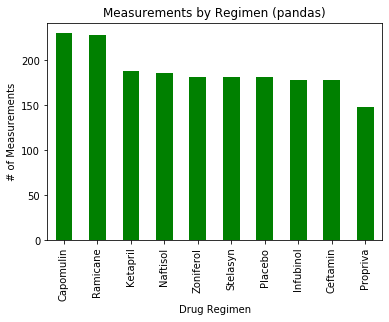

In [24]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Get drug regimen with total number of measurements data
drug_data = clean_study_df["Drug Regimen"].value_counts()

# Configure plot, and color
drug_data.plot(kind="bar", facecolor="green")

# Set properties
plt.title("Measurements by Regimen (pandas)")
plt.ylabel("# of Measurements")
plt.xlabel("Drug Regimen")

# Show plot
plt.show()

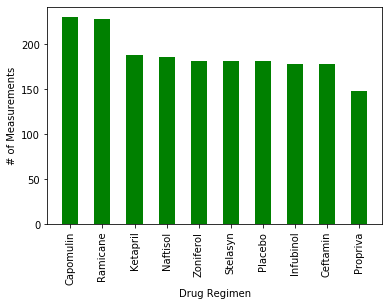

In [25]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Get drug regimen with total number of measurements data
height = clean_study_df['Drug Regimen'].value_counts() #height is the same as drug_data variable for simplicity

#create bar plot
plt.bar(height.index.values, height.values,color="g", width=0.50)

#generate labels, rotate, and display plot
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)#rotate labels to match pandas
plt.ylabel("# of Measurements")
plt.show()

No handles with labels found to put in legend.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc59ffa09e8>],
      dtype=object)

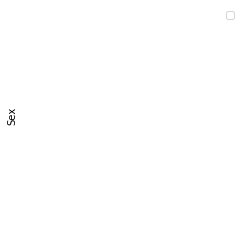

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_pie = pd.DataFrame(index=[clean_study_df], columns=["Sex"])

mouse_pie.plot.pie(subplots=True, figsize=(8, 4))

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
